**Όνομα:** Χρήστος Λούρας  
**ΑΜ:** 03114037

# <h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import itertools
from operator import itemgetter

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [2]:
n=170
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [3]:
#import football.gml from local file using nx.read_gml
football = nx.read_gml('football.gml')

In [4]:
#check if football is directed
print(nx.is_directed(football))

False


In [5]:
#visualize football
nx.draw(football, with_labels=False, node_size=80)

In [6]:
#import lesmis.gml
lesmis = nx.read_gml('lesmis.gml')

In [7]:
#check if lesmis is directed
print(nx.is_directed(lesmis))

False


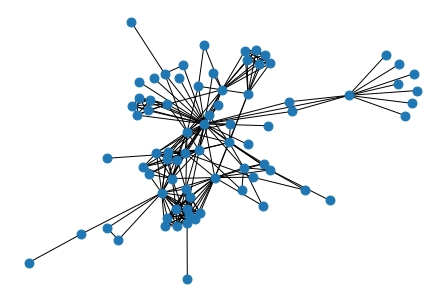

In [8]:
#visualize lesmis
nx.draw(lesmis, with_labels=False, node_size=80)

In [9]:
#import dolphins.gml
dolphins = nx.read_gml('dolphins.gml')

In [10]:
#check if dolphins is directed
print(nx.is_directed(dolphins))

False


In [11]:
#visualize dolphins
nx.draw(dolphins, with_labels=False, node_size=80)

In [12]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football,0)
nlesmis, lesmis_map=conv2int(lesmis,0)
ndolphins, dolphins_map=conv2int(dolphins,0)

#G=nx.relabel_nodes(nG,G_mapping)

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [13]:
def find_degree(G):
    return dict(G.degree())

REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW) 
football_degree = find_degree(nfootball)
lesmis_degree = find_degree(nlesmis)
dolphins_degree = find_degree(ndolphins)

def degree_hist(G_degree, name):
    degrees = list(G_degree.values())
    plt.xlabel('Degree')
    plt.ylabel('#Nodes')
    plt.title(name)
    n, bins, patches = plt.hist(degrees,facecolor='blue')
    plt.show()

mean_degree_REG = np.mean(list(REG_degree.values()))
print('Mean Degree of REG = ',mean_degree_REG)
mean_degree_RGER = np.mean(list(RGER_degree.values()))
print('Mean Degree of RGER = ',mean_degree_RGER)
mean_degree_RGG = np.mean(list(RGG_degree.values()))
print('Mean Degree of RGG = ',mean_degree_RGG)
mean_degree_SF = np.mean(list(SF_degree.values()))
print('Mean Degree of SF = ',mean_degree_SF)
mean_degree_SW = np.mean(list(SW_degree.values()))
print('Mean Degree of SW = ',mean_degree_SW)
mean_degree_football = np.mean(list(football_degree.values()))
print('Mean Degree of FOOTBALL = ',mean_degree_football)
mean_degree_lesmis = np.mean(list(lesmis_degree.values()))
print('Mean Degree of LESMIS = ',mean_degree_lesmis)
mean_degree_dolphins = np.mean(list(dolphins_degree.values()))
print('Mean Degree of DOLPHINS = ',mean_degree_dolphins)

Mean Degree of REG =  4.0
Mean Degree of RGER =  8.823529411764707
Mean Degree of RGG =  10.435294117647059
Mean Degree of SF =  7.811764705882353
Mean Degree of SW =  4.0
Mean Degree of FOOTBALL =  10.660869565217391
Mean Degree of LESMIS =  6.597402597402597
Mean Degree of DOLPHINS =  5.129032258064516


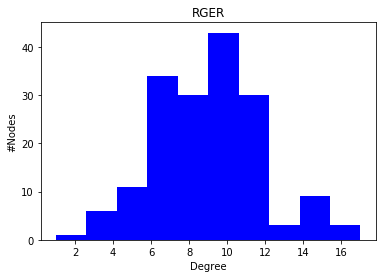

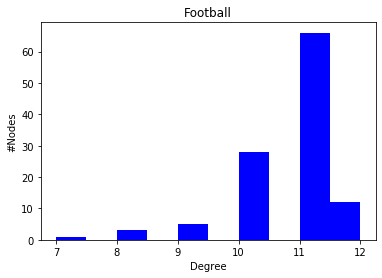

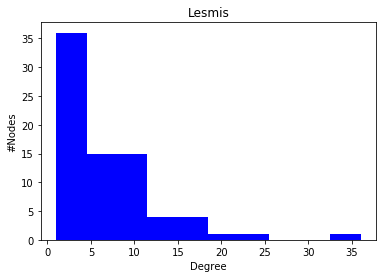

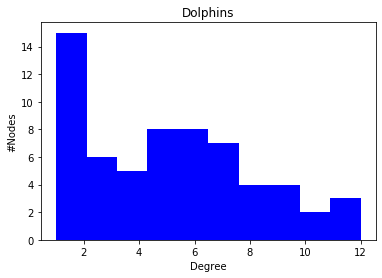

In [14]:
degree_hist(REG_degree, 'REG')
degree_hist(RGER_degree, 'RGER')
degree_hist(RGG_degree, 'RGG')
degree_hist(SF_degree, 'SF')
degree_hist(SW_degree, 'SW')
degree_hist(football_degree, 'Football')
degree_hist(lesmis_degree, 'Lesmis')
degree_hist(dolphins_degree, 'Dolphins')

**Σχολιασμός αποτελεσμάτων:**

Όσον αφορά τους βαθμούς των κόμβων:  
**Football:**  
Το συγκεκριμένο δίκτυο δεν φαίνεται να μοιάζει με κάποια από τις σύνθετες τοπολογίες. Μπορεί η μέση τιμή του να είναι πολύ κοντά σε αυτή της RGG, αλλά σημασία έχει κυρίως η εικόνα της κατανομής.

**Les Miserables:**  
Η κατανομή βαθμών σε αυτό το δίκτυο είναι αρκετά παρόμοια με αυτήν της SF. Κυρίως στην εικόνα-πορεία του γραφήματος γιατί η μέση τιμή είναι σχετικά διαφορετική.

**Dolphins:**  
Η εικόνα της κατανομής του δικτύου δεν μοιάζει με κάποια από τις σύνθετες τοπολογίες. Θα έφερνε σε αυτήν της SF αν δεν είχε το τοπικό μέγιστο γύρω από την τιμή 5-6. Επίσης, και η μέση τιμή της μετρικής δεν πλησιάζει σημαντικά αυτές των συνθετικών τοπολογιών.

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

In [15]:
def clust_coef(G):   
    return nx.clustering(G)

REG_cc = clust_coef(REG)
RGER_cc = clust_coef(RGER)
RGG_cc = clust_coef(RGG)
SF_cc = clust_coef(SF)
SW_cc = clust_coef(SW)
football_cc= clust_coef(nfootball)
lesmis_cc= clust_coef(nlesmis)
dolphins_cc= clust_coef(ndolphins)

def cc_hist(G_cc, name):
    cc = list(G_cc.values())
    plt.xlabel('Cluster Coefficient')
    plt.ylabel('#Nodes')
    plt.title(name)
    n, bins, patches = plt.hist(cc,facecolor='blue')
    plt.show()

mean_cc_REG = np.mean(list(REG_cc.values()))
print('Mean CC of REG = ',mean_cc_REG)
mean_cc_RGER = np.mean(list(RGER_cc.values()))
print('Mean CC of RGER = ',mean_cc_RGER)
mean_cc_RGG = np.mean(list(RGG_cc.values()))
print('Mean CC of RGG = ',mean_cc_RGG)
mean_cc_SF = np.mean(list(SF_cc.values()))
print('Mean CC of SF = ',mean_cc_SF)
mean_cc_SW = np.mean(list(SW_cc.values()))
print('Mean CC of SW = ',mean_cc_SW)
mean_cc_football = np.mean(list(football_cc.values()))
print('Mean CC of FOOTBALL = ',mean_cc_football)
mean_cc_lesmis = np.mean(list(lesmis_cc.values()))
print('Mean CC of LESMIS = ',mean_cc_lesmis)
mean_cc_dolphins = np.mean(list(dolphins_cc.values()))
print('Mean CC of DOLPHINS = ',mean_cc_dolphins)

Mean CC of REG =  0.5
Mean CC of RGER =  0.05158183319948025
Mean CC of RGG =  0.6371756076841673
Mean CC of SF =  0.12524962533707518
Mean CC of SW =  0.20977591036414567
Mean CC of FOOTBALL =  0.40321601104209803
Mean CC of LESMIS =  0.5731367499320135
Mean CC of DOLPHINS =  0.2589582460550202


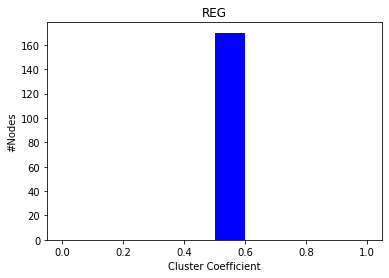

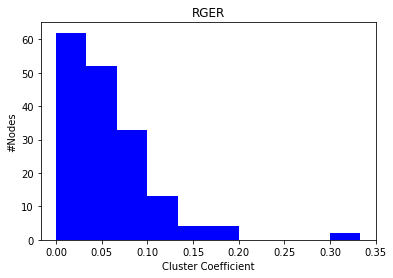

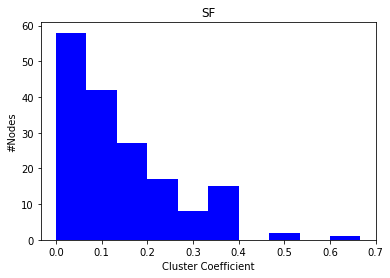

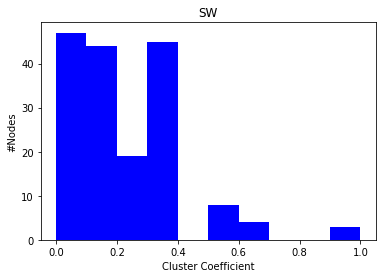

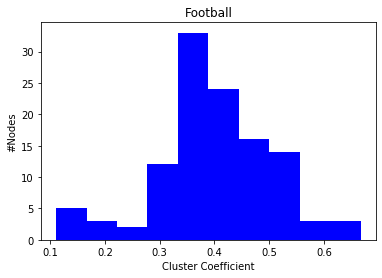

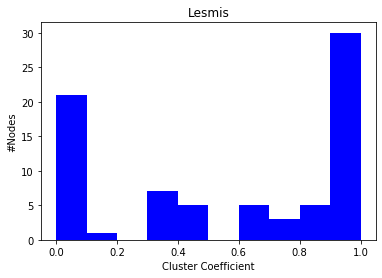

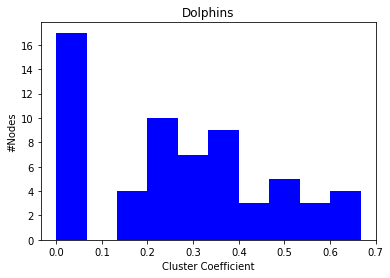

In [16]:
cc_hist(REG_cc, 'REG')
cc_hist(RGER_cc, 'RGER')
cc_hist(RGG_cc, 'RGG')
cc_hist(SF_cc, 'SF')
cc_hist(SW_cc, 'SW')
cc_hist(football_cc, 'Football')
cc_hist(lesmis_cc, 'Lesmis')
cc_hist(dolphins_cc, 'Dolphins')

**Σχολιασμός αποτελεσμάτων:**

Όσον αφορά τις μέσες τιμές, οι πραγματικές τοπολογίες παρουσιάζουν που δεν είναι παρόμοιες με καμμία από τις συνθετικές τοπολογίες.  
Σχετικά με την κατανομή του Σ.Ο. :  
**Football:**  
Το γράφημα μοιάζει με αυτό της τοπολογίας RGG, όμως παρουσιάζει μικρότερο εύρος τιμών η το πραγματικό δίκτυο.  
**Les Miserables:**  
Το γράφημα δεν μπορεί να συσχετιστεί με κανένα γράφημα κάποιας άλλης τοπολογίας.  
**Dolphins:**  
Αν εξαιρέσουμε το μεγάλο πλήθος κόμβων με Σ.Ο ίσο περίπου με 0, το γράφημα μοιάζει σχετικά με αυτό της τοπολογία RGG (αν και έχει μικρότερο εύρος). Η μεγάλη διαφορά μεταξύ των δύο γραφημάτων (πολλοί κόμβοι με μηδενικό Σ.Ο.) οφείλεται στο ότι το στο δίκτυο Dolphins υπάρχουν αρκετοί κόμβοι-φύλλα.

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

In [17]:
def ego_centrality(G):
    ego_dict = {}
    for node in G:
        eg = nx.ego_graph(G, node)
        adj = nx.adjacency_matrix(eg, weight=None).todense()
        adj2 = np.linalg.matrix_power(adj, 2)
        upper_tri = np.triu(np.multiply(adj2, np.ones(adj.shape) - adj), 1)
        ego_dict[node] = sum(np.reciprocal(upper_tri[np.nonzero(upper_tri)]))
    return ego_dict

REG_ebtw = ego_centrality(REG)
RGER_ebtw = ego_centrality(RGER)
RGG_ebtw = ego_centrality(RGG)
SF_ebtw = ego_centrality(SF)
SW_ebtw = ego_centrality(SW)
nfootball_ebtw = ego_centrality(nfootball)
nlesmis_ebtw = ego_centrality(nlesmis)
ndolphins_ebtw= ego_centrality(ndolphins)

def egobtw_hist(G_ebtw, name):
    ebtw = list(G_ebtw.values())
    plt.xlabel('Egobetweenness Centrality')
    plt.ylabel('#Nodes')
    plt.title(name)
    n, bins, patches = plt.hist(ebtw,facecolor='blue')
    plt.show()

mean_ebtw_REG = np.mean(list(REG_ebtw.values()))
print('Mean Ego of REG = ',mean_ebtw_REG)
mean_ebtw_RGER = np.mean(list(RGER_ebtw.values()))
print('Mean Ego of RGER = ',mean_ebtw_RGER)
mean_ebtw_RGG = np.mean(list(RGG_ebtw.values()))
print('Mean Ego of RGG = ',mean_ebtw_RGG)
mean_ebtw_SF = np.mean(list(SF_ebtw.values()))
print('Mean Ego of SF = ',mean_ebtw_SF)
mean_ebtw_SW = np.mean(list(SW_ebtw.values()))
print('Mean Ego of SW = ',mean_ebtw_SW)
mean_ebtw_football = np.mean(list(nfootball_ebtw.values()))
print('Mean Ego of FOOTBALL = ',mean_ebtw_football)
mean_ebtw_lesmis = np.mean(list(nlesmis_ebtw.values()))
print('Mean Ego of LESMIS = ',mean_ebtw_lesmis)
mean_ebtw_dolphins = np.mean(list(ndolphins_ebtw.values()))
print('Mean Ego of DOLPHINS = ',mean_ebtw_dolphins)

Mean Ego of REG =  2.0
Mean Ego of RGER =  36.04117647058823
Mean Ego of RGG =  8.079390756302521
Mean Ego of SF =  39.75843137254902
Mean Ego of SW =  5.076470588235294
Mean Ego of FOOTBALL =  24.722132505175978
Mean Ego of LESMIS =  13.31846011131725
Mean Ego of DOLPHINS =  8.517473118279568


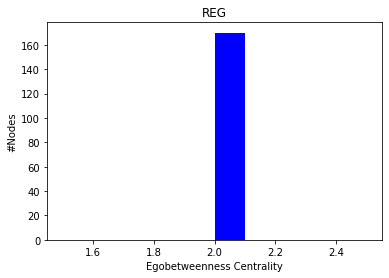

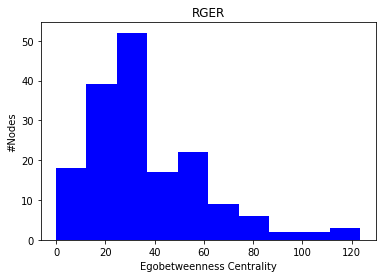

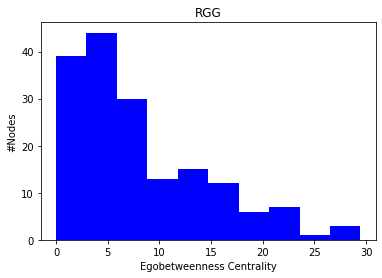

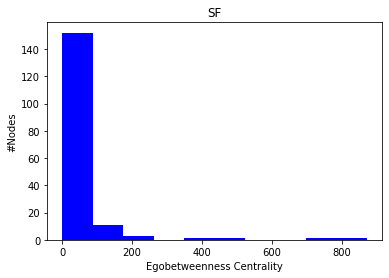

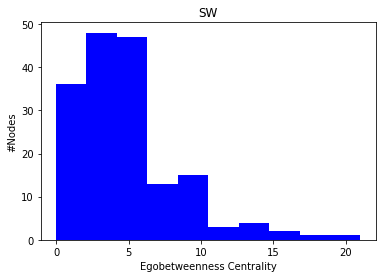

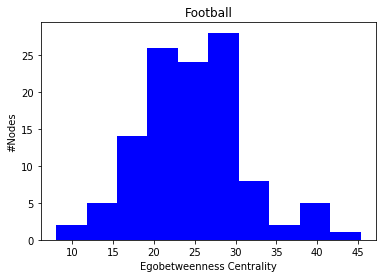

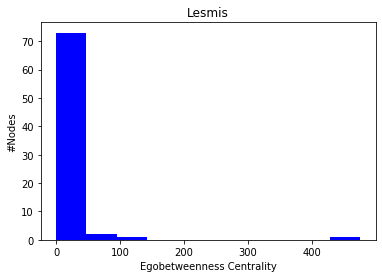

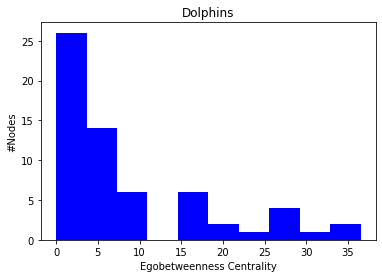

In [18]:
egobtw_hist(REG_ebtw, 'REG')
egobtw_hist(RGER_ebtw, 'RGER')
egobtw_hist(RGG_ebtw, 'RGG')
egobtw_hist(SF_ebtw, 'SF')
egobtw_hist(SW_ebtw, 'SW')
egobtw_hist(nfootball_ebtw, 'Football')
egobtw_hist(nlesmis_ebtw, 'Lesmis')
egobtw_hist(ndolphins_ebtw, 'Dolphins')

**Σχολιασμός αποτελεσμάτων:**

Πρώτον, κανένα από τα πραγματικά δίκτυα δεν έχει μέση τιμή κοντά σε κάποια συνθετικής τοπολογίας.  
Δεύτερον, όσον αφορά τα γραφήματα κατανομής:  
**Football:**  
Το γράφημα κατανομής του δικτύου αυτού δεν μοιάζει καθόλου με κανένα άλλο.  
**Les Miserables:**  
Έχει αρκετά παρόμοια εικόνα με το γράφημα της τοπολογίας SF.  
**Dolphins:**  
Το γράφημα του δικτύου είναι αρκετά κοντά σε αυτό της τοπολογίας RGG. Όμως, παρουσιάζει ένα κενό στις τιμές περίπου 11-14, και διακόπτεται η πτωτική πορεία, που έχουμε και στην τοπολογία RGG.

**Τελικά Συμπεράσματα:**  
  
Δυστυχώς, δεν υπάρχει κάποιο πραγματικό δίκτυο που να έχει ξεκάθαρα παρόμοιες μετρικές με κάποια από τα 5 συνθετικά. Παρακάτω, για κάθε πραγματικό δίκτυο θα γίνει μία αναφορά στο πιο συναφή συνθετικό δίκτυο, συνοψίζοντας τους σχολιασμούς που αναφέρθηκαν για κάθε μετρική.

Football:  
Ήταν το πραγματικό δίκτυο με την μεγαλύτερη δυσκολία στην κατάταξή του σε κάποια συνθετική τοπολογία. Οι μετρικές για αυτό δεν είχαν παρόμοια αποτελέσματα με κανένα άλλο, με εξαίρεση στο Σ.Ο. , όπου έφερνε κάπως στο RGG. Όμως, δύσκολα μπορούμε να κάνουμε γενικά την συσχέτιση μεταξύ του Football και την τοπολογίας RGG.
  
Les Miserables:  
Αν και αυτό δεν ταίριαζε με την ίδια τοπολογία και στις 2 μετρικές, η κατάταξή του είναι πιο εύκολη. Στις μετρικές Degree και Ego-Centrality είχε παρόμοια εικόνα με αυτήν ενός γράφου τοπολογίας SF, Αν και στην μετρική Cluster Coefficient δεν ήταν δυνατόν να εξαχθούν συμπεράσματα, Στις μετρικές Degree και Ego-Centrality είχε αρκετά παρόμοια εικόνα με αυτήν ενός γράφου τοπολογίας SF. Συνεπώς, θα μπορούσε να καταταχθεί (όχι με απόλυτη σιγουριά) στην τοπολογία SF.  
  
Dolphins:
Η εικόνα σε αυτό δεν είναι τόσο ξεκάθαρη όσο στο Les Miserables, αλλά αρκετά καλύτερη από το Football. Και στις 3 μετρικές ήταν πάνω-κάτω δυνατόν να συσχετίσουμε τις τιμές του δικτύου με αυτές κάποις συνθετικής τοπολογίας, όμως δεν ήταν σε όλες περιπτώσεις η ίδια συνθετική τοπολογία. Στην μετρική Degree έφερνε στην τοπολογία SF, όμως με κάποιες διαφορές (όχι ασήμαντες) ενώ στις άλλες 2 μετρικές περισσότερο στην τοπολογία RGG (με σχετικά μεγαλύτερη σιγουρία σε αυτές τις δύο). Επομένως, αν έπρεπε να γίνει μία κατάταξη θα προτιμούταν η τοπολογία RGG.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση networkx.algorithms.community.quality.modularity.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [19]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
colors.remove('w') # gia na mhn mperdevetai me to background

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

In [20]:
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.modularity to measure modularity
def comd_GN(G,k=50):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    ls = []
    for communities in itertools.islice(comp, k):
        a = tuple(sorted(c) for c in communities)
        modularity = nx.algorithms.community.quality.modularity(G, a)
        ls.append((a, modularity))
    sorted_ls = sorted(ls, key=itemgetter(1), reverse=True)
    best = sorted_ls[0]
    return ls, sorted_ls, best        

In [21]:
GN_dict = {}
GN_dict_sorted = {}
GN_best_dict = {}
GN_dict['REG'],GN_dict_sorted['REG'], GN_best_dict['REG'] = comd_GN(REG)
GN_dict['RGER'],GN_dict_sorted['RGER'], GN_best_dict['RGER'] = comd_GN(RGER)
GN_dict['RGG'],GN_dict_sorted['RGG'], GN_best_dict['RGG'] = comd_GN(RGG)
GN_dict['SF'],GN_dict_sorted['SF'], GN_best_dict['SF'] = comd_GN(SF)
GN_dict['SW'],GN_dict_sorted['SW'], GN_best_dict['SW'] = comd_GN(SW)
GN_dict['Football'],GN_dict_sorted['Football'], GN_best_dict['Football'] = comd_GN(nfootball)
GN_dict['Lesmis'],GN_dict_sorted['Lesmis'], GN_best_dict['Lesmis'] = comd_GN(nlesmis)
GN_dict['Dolphins'],GN_dict_sorted['Dolphins'], GN_best_dict['Dolphins'] = comd_GN(ndolphins)


<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [22]:
#Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def create_communities(labels, k):
    # k -> number of communities
    comms = []
    for i in range(k):
        comms.append([])
    node_cnt = 0
    for comm in labels:
        comms[comm].append(node_cnt)
        node_cnt = node_cnt + 1
    return comms

def comd_SC(G,k=50):
    adj = nx.adjacency_matrix(G).todense()
    ls = []
    for i in range(1, k+1):
        sc = SpectralClustering(i, affinity='precomputed', assign_labels='discretize', n_jobs=-1)
        comm_labels = list(sc.fit_predict(adj))
        comms = create_communities(comm_labels, i)
        modularity = nx.algorithms.community.quality.modularity(G, comms)
        ls.append((comms, modularity))
    sorted_ls = sorted(ls, key=itemgetter(1), reverse=True)
    best = sorted_ls[0]
    return ls, sorted_ls, best

In [23]:
SC_dict = {}
SC_dict_sorted = {}
SC_best_dict = {}
SC_dict['REG'],SC_dict_sorted['REG'], SC_best_dict['REG'] = comd_SC(REG)
SC_dict['RGER'],SC_dict_sorted['RGER'], SC_best_dict['RGER'] = comd_SC(RGER)
SC_dict['RGG'],SC_dict_sorted['RGG'], SC_best_dict['RGG'] = comd_SC(RGG)
SC_dict['SF'],SC_dict_sorted['SF'], SC_best_dict['SF'] = comd_SC(SF)
SC_dict['SW'],SC_dict_sorted['SW'], SC_best_dict['SW'] = comd_SC(SW)
SC_dict['Football'],SC_dict_sorted['Football'], SC_best_dict['Football'] = comd_SC(nfootball)
SC_dict['Lesmis'],SC_dict_sorted['Lesmis'], SC_best_dict['Lesmis'] = comd_SC(nlesmis)
SC_dict['Dolphins'],SC_dict_sorted['Dolphins'], SC_best_dict['Dolphins'] = comd_SC(ndolphins)

<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [24]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_MM(G):
    comms = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    modularity = nx.algorithms.community.quality.modularity(G, comms)
    return (comms, modularity)

In [25]:
MM_dict = {}
MM_dict['REG'] = comd_MM(REG)
MM_dict['RGER'] = comd_MM(RGER)
MM_dict['RGG'] = comd_MM(RGG)
MM_dict['SF'] = comd_MM(SF)
MM_dict['SW'] = comd_MM(SW)
MM_dict['Football'] = comd_MM(nfootball)
MM_dict['Lesmis'] = comd_MM(nlesmis)
MM_dict['Dolphins'] = comd_MM(ndolphins)

<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [83]:
def create_node_color_list(G, comms):
    n_colors = [None] * len(G.nodes())
    i = 0
    for comm in comms:
        for node in list(comm):
            n_colors[node] = colors[i]
        i = i + 1
    return n_colors


def visual_com(G, comms):
    n_colors = create_node_color_list(G, comms)
    if G==REG or G==RGER or G==SF or G==SW:
        nx.draw_circular(G, node_color=n_colors,node_size=50,with_labels=False,width=0.5)
    elif G==RGG:
        pos = nx.get_node_attributes(G, 'pos')
        nx.draw_networkx_edges(G, pos=pos, width=0.5)
        nx.draw_networkx_nodes(G, pos=pos, node_size=50, node_color=n_colors)
    else:
        nx.draw_networkx(G, node_color=n_colors,node_size=50,with_labels=False,width=0.5)

<h3>a. Οπτικοποίηση κοινοτήτων Les Miserables.

**Girvan-Newman:**

Number of Communities :  11
Modularity :  0.5380680761361525


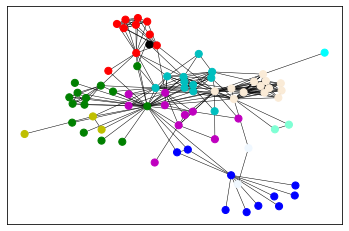

In [84]:
(comms, modularity) = GN_best_dict['Lesmis']
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(nlesmis, comms)

**Spectral Clustering:**

Number of Communities :  9
Modularity :  0.5479260958521924


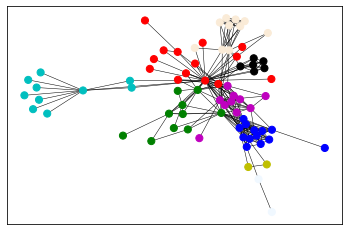

In [85]:
(comms, modularity) = SC_best_dict['Lesmis']
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(nlesmis, comms)

**Modularity Maximization:**

Number of Communities :  5
Modularity :  0.5005967511935037


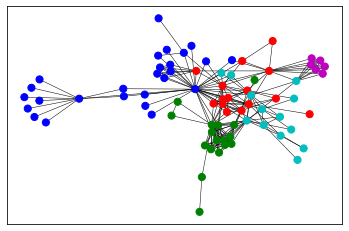

In [86]:
(comms, modularity) = MM_dict['Lesmis']
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(nlesmis, comms)

Σχολιασμός Les Miserables:  
Το καλύτερο modularity το δίνει η μέθοδος Spectral Clustering με 8 κοινότητες, ενώ η μέθοδος Newman-Givran έχει σχεδόν ίδιο modularity αλλά με περισσότερες κοινότητες(11), ενώ η Modularity Maximization δίνει το χειρότερο αποτέλεσμα (βέβαια πολύ κοντινό στις άλλες δύο) με μόνο 5 κοινότητες.
Εδώ παρατηρούμε ότι αν και η 1η μέθοδος βρήκε περισσότερες κοινότητες, είχε λίγο χειρότερο modularity, το οποίο είναι αναμενόμενο ανάλογα το πρόβλημα, διότι περισσότερες κοινότητες δεν σημαίνει ότι και αυτές έχουν σαφή όρια μεταξύ τους.

<h3>b. Οπτικοποίηση κοινοτήτων American College Football.

**Girvan-Newman:**

Number of Communities :  10
Modularity :  0.599629027407791


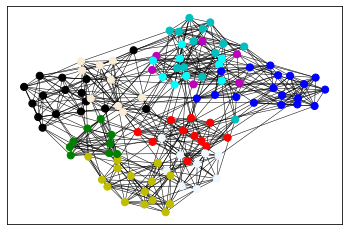

In [87]:
(comms, modularity) = GN_best_dict['Football'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(nfootball, comms)

**Spectral Clustering:**

In [88]:
(comms, modularity) = SC_best_dict['Football'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(nfootball, comms)

Number of Communities :  11
Modularity :  0.6022010863056764


**Modularity Maximization:**

In [89]:
(comms, modularity) = MM_dict['Football'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(nfootball, comms)

Number of Communities :  6
Modularity :  0.5497406651426727


Σχολιασμός American Football:  
Και εδώ υπερισχύει ελάχιστα το Spectral CLustering (με 11 κοινότητες) έναντι του Newman-Girvan(με 10 κοινότητες) και χιερότερη μέθοδος είναι η Modularity Maximization η οποία δίνει και εδώ τον μικρό αριθμό κοινοτήτων(6).


<h3>c. Οπτικοποίηση κοινοτήτων Dolphins.

**Girvan-Newman:**

Number of Communities :  5
Modularity :  0.5193821446936422


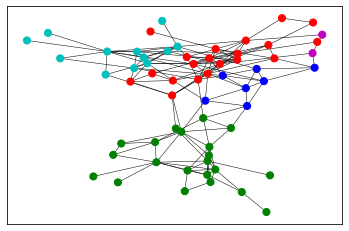

In [90]:
(comms, modularity) = GN_best_dict['Dolphins'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(ndolphins, comms)

**Spectral Clustering:**

Number of Communities :  5
Modularity :  0.5068430837387754


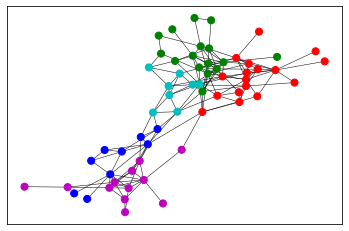

In [91]:
(comms, modularity) = SC_best_dict['Dolphins'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(ndolphins, comms)

**Modularity Maximization:**

Number of Communities :  4
Modularity :  0.49549068470392815


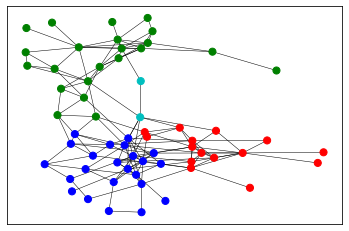

In [92]:
(comms, modularity) = MM_dict['Dolphins'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(ndolphins, comms)

Σχολιασμός Dolphins:  
Και οι 3 μεθόδοι οδηγησαν σε παρόμοιο modularity και αριθμό κοινοτήτων. Μόνο η 3η μέθοδος (MM) κατέληξε σε διαχωρισμό με 1 λιγότερη κοινότητα. Σε αντίθεση με τα 2 προηγούμενα δίκτυα, εδώ την καυτερη τιμή την δίνει η 1 μέθοδος, Newman-Girvan.

<h3>d. Οπτικοποίηση κοινοτήτων REG.

**Girvan-Newman:**

Number of Communities :  8
Modularity :  0.8043598615917437


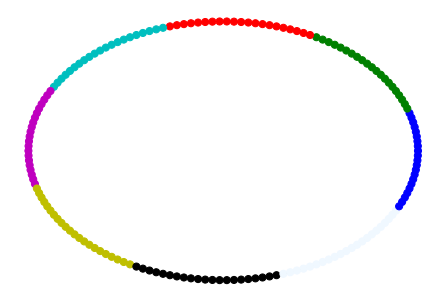

In [93]:
(comms, modularity) = GN_best_dict['REG'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(REG, comms)

**Spectral Clustering:**

In [94]:
(comms, modularity) = SC_best_dict['REG'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(REG, comms)

Number of Communities :  11
Modularity :  0.8119377162630099


**Modularity Maximization:**

In [95]:
(comms, modularity) = MM_dict['REG'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(REG, comms)

Number of Communities :  4
Modularity :  0.7137716262976508


Σχολιασμός REG:  
Το καλύτερο modularity το πετυχαίνει η μέθοδος Spectral Clustering και βρίσκει 11 κοινότητες, 2η έρχεται η μεοδος Newman-Givman με 10 κοινότητες και λίγο χειρότερο modularity και τελευταία η μέθοδος Modularity Maximization με 4 μόνο κοινότητες. Τέλος, και οι 3 μεθόδοι πετυχαίνουν πολύ καλό modularity, το οποίο οφείλεται στο γεγονός ότι πρόκειται για δακτύλιο δίχως διαγώνιες ακμές και το χαμηλό d=4 περιορίζει αρκετά τις ακμές που υπάρχουν ανάμεσα σε 2 γειτονικές κοινότητες.

<h3>e. Οπτικοποίηση κοινοτήτων RGER.

**Girvan-Newman:**

In [96]:
(comms, modularity) = GN_best_dict['RGER'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(RGER, comms)

Number of Communities :  51
Modularity :  0.12319911111111123


**Spectral Clustering:**

Number of Communities :  5
Modularity :  0.28309688888889256


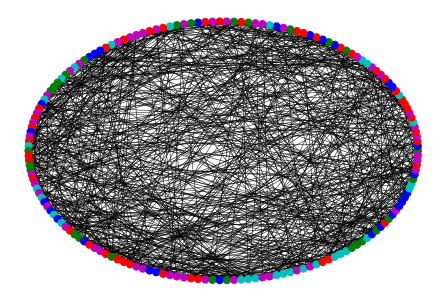

In [97]:
(comms, modularity) = SC_best_dict['RGER'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(RGER, comms)

**Modularity Maximization:**

Number of Communities :  6
Modularity :  0.27668533333333445


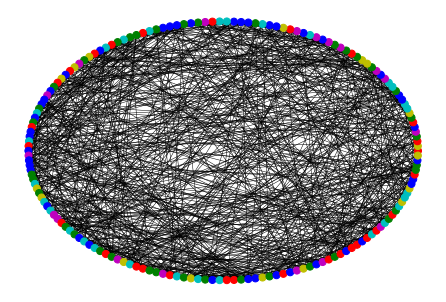

In [98]:
(comms, modularity) = MM_dict['RGER'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(RGER, comms)

Σχολιασμός RGER:  
Καλύτερη μέθοδος είναι η Spectral Clustering με 5 κοινότητες και πολύ κοντά έρχεται η 3η μέθοδος ,Modularity Maximization με 6 κοινότητες, ενώ η Newman-Girvan δίνει πολύ χειρότερο αποτέλεσμα με πολύ περισσότερες κοινότητες (51). Από αυτά βγάζουμε 2 πορίσματα. Πρώτον, η εύρεση κοινοτήτων στην τοπολογία RGER αποτυγχάνει όταν το ποβλημα προσεγγίζεται μέσω της Betweeness Centrality των κόμβων (αυτό χρησιμοποιεί η 1η μέθοδος για τις τομές στον γράφο). Δεύτερον, είνα γενικά δύσκολο να γίνει μία αξιόλογη τομή σε κοινότητες μιας τοπολογίας RGER (και οι 3 μεθόδοι είχαν πολύ χαμηλό modularity) το οποίο πιθανόν οφείλεται στο ότι δεν έχει ιδιαίτερα χαρακτηριστικά (τυχαίος γράφος) όπως η RGG, SF.

<h3>f. Οπτικοποίηση κοινοτήτων RGG.

**Girvan-Newman:**

Number of Communities :  10
Modularity :  0.7447052438517471


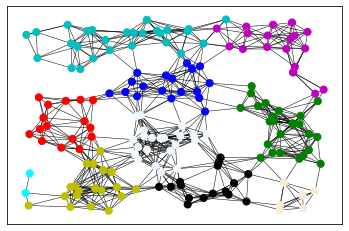

In [99]:
(comms, modularity) = GN_best_dict['RGG'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(RGG, comms)

**Spectral Clustering:**

Number of Communities :  10
Modularity :  0.7450064758524994


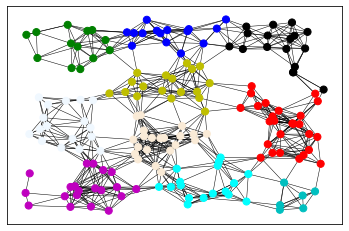

In [100]:
(comms, modularity) = SC_best_dict['RGG'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(RGG, comms)

**Modularity Maximization:**

Number of Communities :  5
Modularity :  0.7052025435674176


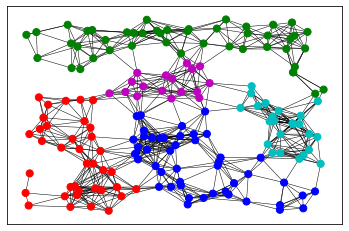

In [101]:
(comms, modularity) = MM_dict['RGG'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(RGG, comms)

Σχολιασμός RGG:  
Την καλύτερη τιμή την δίνει η μέθοδος Spectral Clustering με 10 κοινότητες. Βέβαια και η 1η μέθοδος Newman-Girvan δίνει σχεδόν πανομοιότυπη τιμή στο modularity. Επισης, μία επιπλέον οπτική παρατήρηση από τις αναπαραστάσεις είναι το ότι ,αν και οι 2 μέθοδοι κατέληξαν σε ίδιο αριθμό κοινοτήτων, η ομαδοποίηση των κόμβων είναι σχετικά διαφορετική.
Επίσης, και η 3η μέθοδος οδήγησε σε μέτριο προς καλό modularity (με περισσότερες κοινότητες), όμως όχι τόσο καλό έναντι των 2 άλλων μεθόδων.  
Οι αρκετά καλές τιμές και των 3 μεθόδων (ειδικά των πρώτων 2) οφείλεται στο ότι πρόκειται για τυχαίο γεωμετρικό γράφο, στους οποίους υπάρχει η τάση να διαμορφώνονται κοινότητες( ως κλίκες) ειδικά όταν το πλήθος των κόμβων είναι μεγάλο και η ακτίνα δεν είναι μικρή.

<h3>g. Οπτικοποίηση κοινοτήτων SW.

**Girvan-Newman:**

Number of Communities :  14
Modularity :  0.6144809688581455


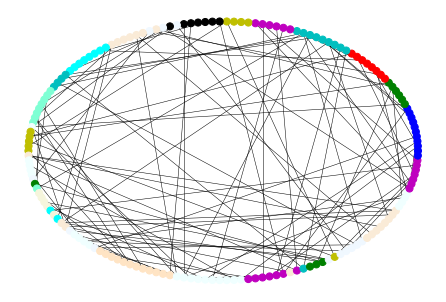

In [102]:
(comms, modularity) = GN_best_dict['SW'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(SW, comms)

**Spectral Clustering:**

Number of Communities :  15
Modularity :  0.6008304498270036


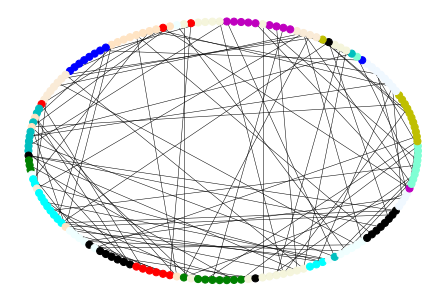

In [103]:
(comms, modularity) = SC_best_dict['SW'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(SW, comms)

**Modularity Maximization:**

Number of Communities :  12
Modularity :  0.6181747404844391


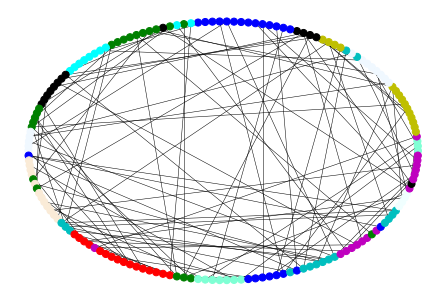

In [104]:
(comms, modularity) = MM_dict['SW'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(SW, comms)

Σχολιασμός SW:  
Και οι 3 μέθοδοι βρίσκουν διαχωρισμούς του γράφου με παρόμοια τιμή στο modularity, με την μέθοδο Modulairty Maximization να υπερέχει ελάχιστα και να οδηγεί και στο μικρότερο πλήθος κοινοτήτων (12 έναντι 14 και 15 στα GN, SC αντίστοιχα).
Οι τιμές του moldularity που παρατηρούνται είναι μέτριες προς καλές το οποίο εξηγείται από το γεγονός ότ πρόκειται για έναν τροποποιημένο REG με χαμηλή πιθανότητα ανασύνδεσης, άρα και με λίγες διαγώνιες ακμές.

<h3>h. Οπτικοποίηση κοινοτήτων SF.

**Girvan-Newman:**

Number of Communities :  36
Modularity :  0.226597655682971


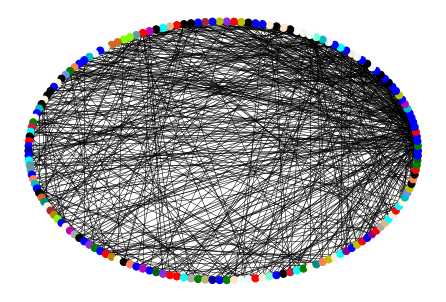

In [105]:
(comms, modularity) = GN_best_dict['SF'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(SF, comms)

**Spectral Clustering:**

Number of Communities :  7
Modularity :  0.291707114602982


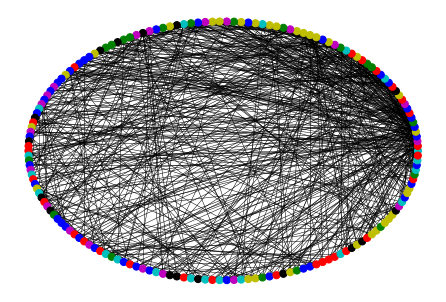

In [106]:
(comms, modularity) = SC_best_dict['SF'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(SF, comms)

**Modularity Maximization:**

Number of Communities :  7
Modularity :  0.29889361663520675


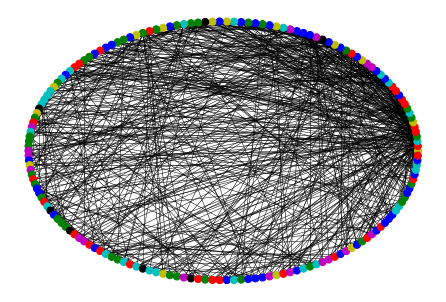

In [107]:
(comms, modularity) = MM_dict['SF'] 
print("Number of Communities : ",len(comms))
print("Modularity : ", modularity)
visual_com(SF, comms)

Σχολιασμός SF:  
Στην τοπολογία SF όλες οι μέθοδοι οδηγούν σε μέτριο προς κακό modularity. Οι τιμές του modularity των μεθόδων Spectral Clustering και Modularity Maximization είναι σχεδόν ίδιες με ίδιο αριθμό κοινοτήτων(7), ενώ η μέθοδος Newman-Girvan έχει το χειρότερο αποτέλεσμα με αρκετά μεγάλο πλήθος κοινοτήτων (36).
Η χαμηλή απόδοση και των τριών μεθόδων στην τοπολογία SF, οφείλεται κυρίως στην κατανομή power-law η οποία οδηγεί στην εμφάνιση λίγων κλικών και πολλών διαγώνιων ακμών στο δακτύλιο.

<h4>Γενικοι Σχολιασμοί Συνθετικών Τοπολογιών:

Συνολικά, την καλύτερη απόδοση την είχε η μέθοδος Spectral Clustering, η οποία είχε την καλύτερη τιμή στις τοπολογίες REG, RGER, RGG και σχεδόν την καλύτερη στο SF. 2η γενική καλύτερη απόδοση είχε η Modularity Maximization, η οποία είχε τις καλύτερες τιμές στις τοπολογίες SF και SW, ενώ και στις υπόλοιπες ήταν αρκετά κοντά στις καλύτερες. Η μέθοδος Newman-Girvan είχε την χειρότερη εικόνα, ειδικά στις τοπολογίες RGER  και SF. Βέβαια και αυτή η μέθοδος είχε αντίστοιχα καλά αποτελέσματα με τις άλλες στις υπόλοιπες περιπτώσεις.  

Μέτριες προς καλές τιμές στο Modularity βλέπουμε στις τοπολογίες REG, RGG, SW (με φθίνουσα σειρά) ενώ στις RGER και SF αρκετά χαμηλές. Όσον αφορά την καλή απόδοση στις REG, RGG έγινε προσπάθεια εξήγησής της προηγουμένως σε κάθε τοπολογία, ενώ η καλή απόδοση στην SW έχει να κάνει κυρίως με την χαμήλη πιθανότητα ανασύνδεσης.  
Αντιθέτως, στις άλλες 2 τοπολογίες λόγω του μεγάλου πλήθους διαγώνιων ακμών (RGER, SF) και οι 3 μέθοδοι απέτυγχαν να βρούν χωρισμό του γράφου με μέτριο ή υψηλό modularity (περισσότερες διαγώνιες ακμές -> μικρότερη πιθανότητα ύπαρξης κλικών). Τέλος, μία επιπλέον σχετική παρατήρηση είναι ότι όσο αυξάνονται οι ακμές που διασχίζουν διαγώνια τον δακτύλιο, τόσο χαμηλότερο modularity επιτυγχάνουμε με μη ξεκάθαρα ευδιάκριτες κοινότητες.